<a href="https://colab.research.google.com/github/Moostafaaa/Autoencoder_CNN/blob/main/AE_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:

from keras.layers import *

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.callbacks import TensorBoard

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/50
469/469 [==============================] - 15s 8ms/step - loss: 0.1653 - val_loss: 0.1172
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1133 - val_loss: 0.1088
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1079 - val_loss: 0.1049
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1051 - val_loss: 0.1028
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1032 - val_loss: 0.1014
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1017 - val_loss: 0.1003
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1004 - val_loss: 0.0990
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0996 - val_loss: 0.0982
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0989 - val_loss: 0.0977
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0983 - val_loss: 0.097

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
import matplotlib.pyplot as plt

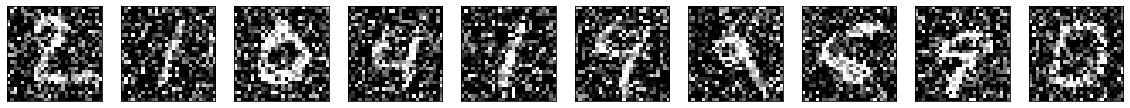

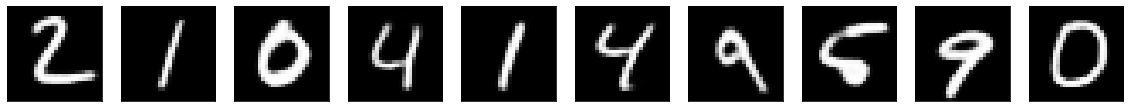

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 2ms/step
